In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
try:
    import pandas_datareader as web

except:
    !pip install pandas_datareader
    import pandas_datareader as web


In [111]:
def MDD(ticker, startdate, enddate):
    balance = web.get_data_yahoo(ticker, startdate, enddate)['Adj Close']
    max_drawdown = [balance[0]]

    for i in range(1, len(balance)):
        max_drawdown.append(balance[0:i+1].max())

    drawdown, mdd = [], []

    for i in range(len(balance)):
        drawdown.append((balance[i] -max_drawdown[i])/max_drawdown[i])
        mdd.append(min(drawdown))

    df = pd.DataFrame([drawdown, mdd]).transpose()
    df.index = balance.index
    df.columns = ['drawdown', 'mdd']
    max = pd.DataFrame([max_drawdown]).transpose()
    max.index = balance.index

    end = df['mdd'].idxmin()
    price = max.loc[end][0]
    start = max.index[max[0] == price][0]   
    

    return drawdown, mdd, df, max, start, end

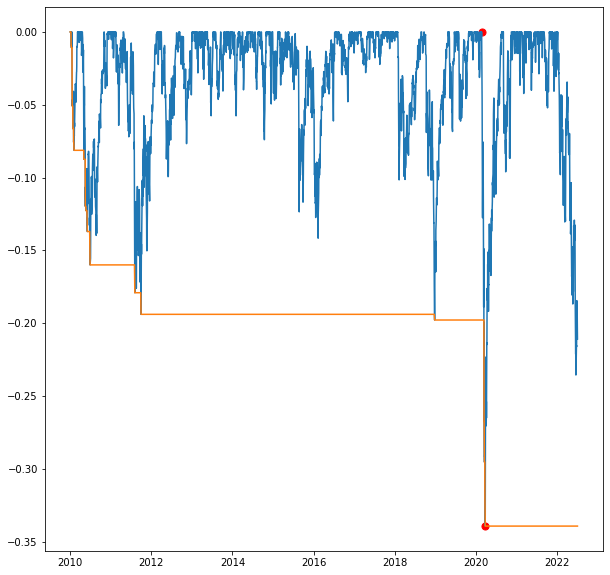

In [112]:
drawdown, mdd, df, max, mdd_start, mdd_end = MDD('^GSPC', '2010-01-02', '2022-06-30')


plt.subplots(figsize= [10,10])

plt.scatter(mdd_start , df[df.index == mdd_start]['drawdown'][0], s = 50 ,color = 'r')
plt.scatter(mdd_end, df[df.index == mdd_end]['drawdown'][0], s = 50 ,color = 'r')

plt.plot(df)

In [113]:
print(mdd_start, mdd_end)

2020-02-19 00:00:00 2020-03-23 00:00:00


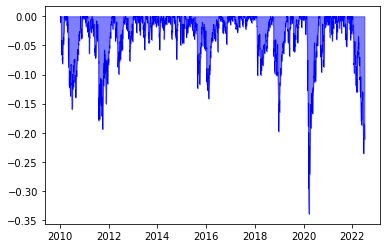

In [5]:
plt.plot(df.drawdown, linewidth = 0.5, color = 'b')
plt.fill_between(df.index, df.drawdown.max(), df.drawdown, alpha = 0.5, color = 'b')

In [13]:
MDD = "%0.4f%%" % (min(mdd) *100)

MDD



'-33.9250%'

In [72]:
start = df.index[(df['mdd'] == df['mdd'].min())][0]

In [74]:
price = max.loc[start][0]
max.index[max[0] == price][0]

In [75]:
max.index[max[0] == price][0]

Timestamp('2020-02-19 00:00:00')

In [96]:
df

,drawdown,mdd
Date,,
2010-01-04,0.000000,0.00000
2010-01-05,0.000000,0.00000
2010-01-06,0.000000,0.00000
2010-01-07,0.000000,0.00000
2010-01-08,0.000000,0.00000
...,...,...
2022-06-24,-0.184470,-0.33925
2022-06-27,-0.186894,-0.33925
2022-06-28,-0.203273,-0.33925


In [108]:
df['mdd'].idxmin()

Timestamp('2020-03-23 00:00:00')